# 데이터 수집

### 필요 라이브러리 설치

In [18]:
!pip install -U finance-datareader

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [14]:
!pip install bs4

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [16]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


### 필요 라이브러리 import

In [5]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

### 데이터 준비

In [6]:
df = fdr.DataReader('005930', '2023-01-01', '2024-02-28')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-02,55500,56100,55200,55500,10031448,0.003617
2023-01-03,55400,56000,54500,55400,13547030,-0.001802
2023-01-04,55700,58000,55600,57800,20188071,0.043321
2023-01-05,58200,58800,57600,58200,15682826,0.006920
2023-01-06,58300,59400,57900,59000,17334989,0.013746
...,...,...,...,...,...,...
2024-02-22,73800,73900,72700,73100,15208934,0.001370
2024-02-23,73600,74200,72900,72900,16225166,-0.002736
2024-02-26,72300,73200,72200,72800,14669352,-0.001372


<Axes: xlabel='Date'>

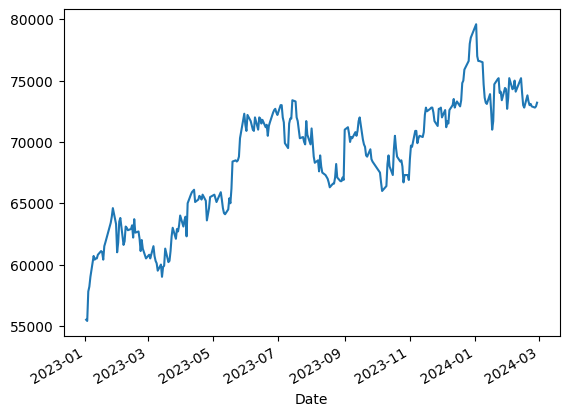

In [7]:
df = fdr.DataReader('005930', '2023-01-01', '2024-02-28').loc[:,'Close']
df.plot()

### 데이터 정규화

<Axes: xlabel='Date'>

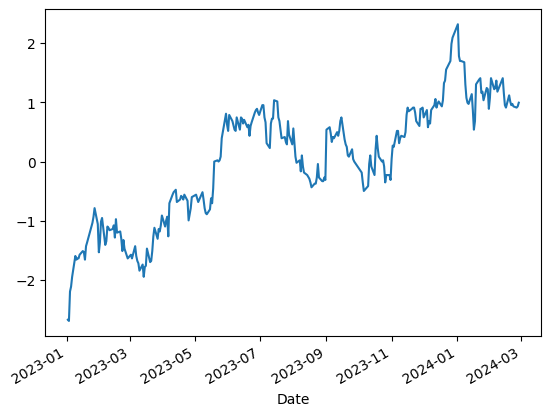

In [8]:
# z-value
df = (df - df.mean())/df.std()
df.plot()

<Axes: xlabel='Date'>

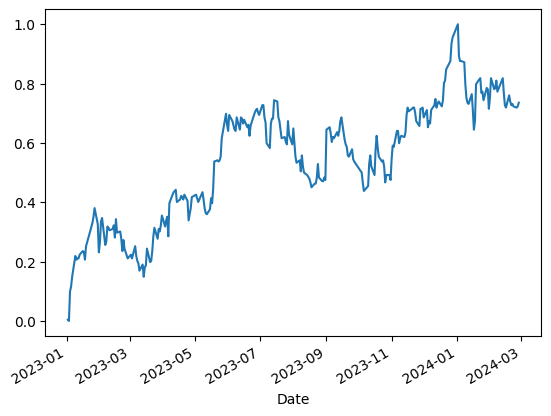

In [9]:
# min-max
df = (df - df.min())/(df.max() - df.min())
df.plot()

### 검증 데이터 분리

In [10]:
# 기간 필터링
demands = df.loc[(df.index >= '2023-01-01') & (df.index <= '2024-02-14')]
demands.info()
demands

test_demands = df.loc[(df.index >= '2024-02-15') & (df.index <= '2024-02-28')]
test_demands.info()
test_demands

<class 'pandas.core.series.Series'>
DatetimeIndex: 275 entries, 2023-01-02 to 2024-02-14
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
275 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2024-02-15 to 2024-02-28
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


Date
2024-02-15    0.727273
2024-02-16    0.719008
2024-02-19    0.760331
2024-02-20    0.739669
2024-02-21    0.727273
2024-02-22    0.731405
2024-02-23    0.723140
2024-02-26    0.719008
2024-02-27    0.723140
2024-02-28    0.735537
Name: Close, dtype: float64

<Axes: xlabel='Date'>

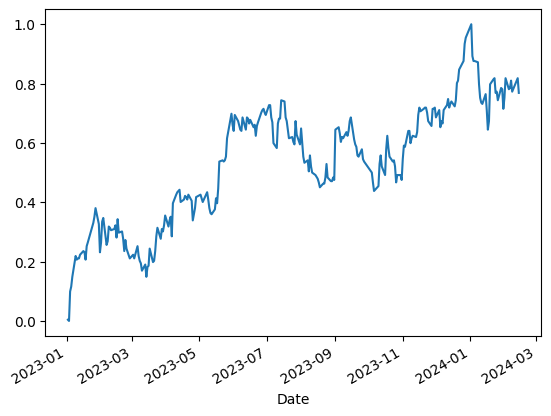

In [11]:
demands.plot()

<Axes: xlabel='Date'>

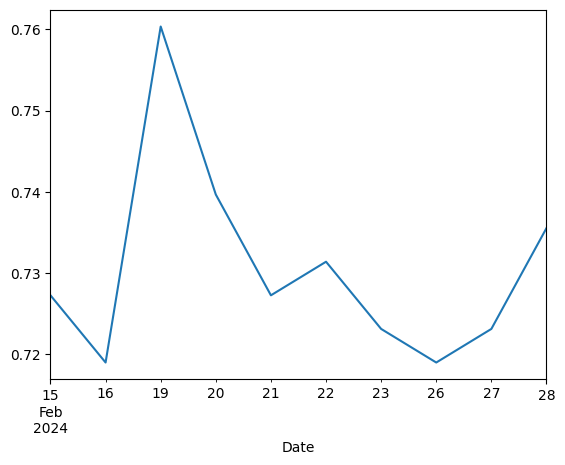

In [12]:
test_demands.plot()

### Moving average 구하기

In [13]:
demands.head(10)

Date
2023-01-02    0.004132
2023-01-03    0.000000
2023-01-04    0.099174
2023-01-05    0.115702
2023-01-06    0.148760
2023-01-09    0.219008
2023-01-10    0.206612
2023-01-11    0.210744
2023-01-12    0.210744
2023-01-13    0.223140
Name: Close, dtype: float64

In [14]:
# rolling https://wikidocs.net/152788

ma3 = demands.rolling(window=3, min_periods=1).mean()
print(ma3)
ma20 = demands.rolling(window=20, min_periods=1).mean()
ma60 = demands.rolling(window=60, min_periods=1).mean()

Date
2023-01-02    0.004132
2023-01-03    0.002066
2023-01-04    0.034435
2023-01-05    0.071625
2023-01-06    0.121212
                ...   
2024-02-06    0.794766
2024-02-07    0.792011
2024-02-08    0.789256
2024-02-13    0.800275
2024-02-14    0.786501
Name: Close, Length: 275, dtype: float64


### 시각화

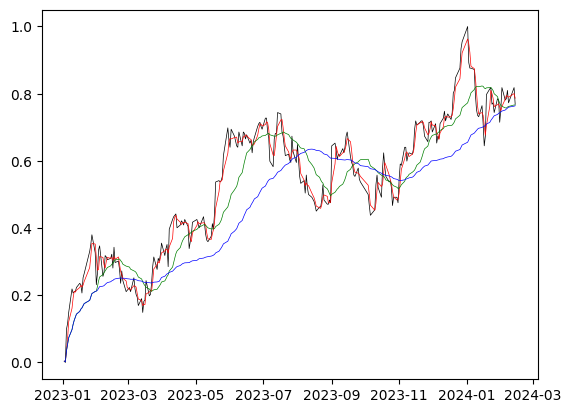

In [15]:
import matplotlib.pyplot as plt

plt.plot(demands, label='actual', linestyle='solid', color='black', linewidth=0.5)
plt.plot(ma3, label='ma3', linestyle='solid', color='red', linewidth=0.5)
plt.plot(ma20, label='ma20', linestyle='solid', color='green', linewidth=0.5)
plt.plot(ma60, label='ma60', linestyle='solid', color='blue', linewidth=0.5)

plt.show()

###  10일 (test_demand) 예측해보기

In [16]:
# ma3로 예측
window_size = 3
windows = demands.tail(window_size).values
predicts = []
for i in range(len(test_demands)):
    p = np.mean(windows[-3:])
    predicts.append((p))
    windows = np.append(windows, p)
print(f'predicts: {predicts}')
print(f'test_demands: {test_demands.to_list()}')

predicts: [np.float64(0.7865013774104682), np.float64(0.7910927456382001), np.float64(0.7820630547903274), np.float64(0.7865523926129986), np.float64(0.7865693976805087), np.float64(0.7850616150279449), np.float64(0.7860611351071508), np.float64(0.7858973826052015), np.float64(0.7856733775800991), np.float64(0.7858772984308171)]
test_demands: [0.7272727272727273, 0.7190082644628099, 0.7603305785123966, 0.7396694214876032, 0.7272727272727273, 0.731404958677686, 0.7231404958677685, 0.7190082644628099, 0.7231404958677685, 0.7355371900826445]


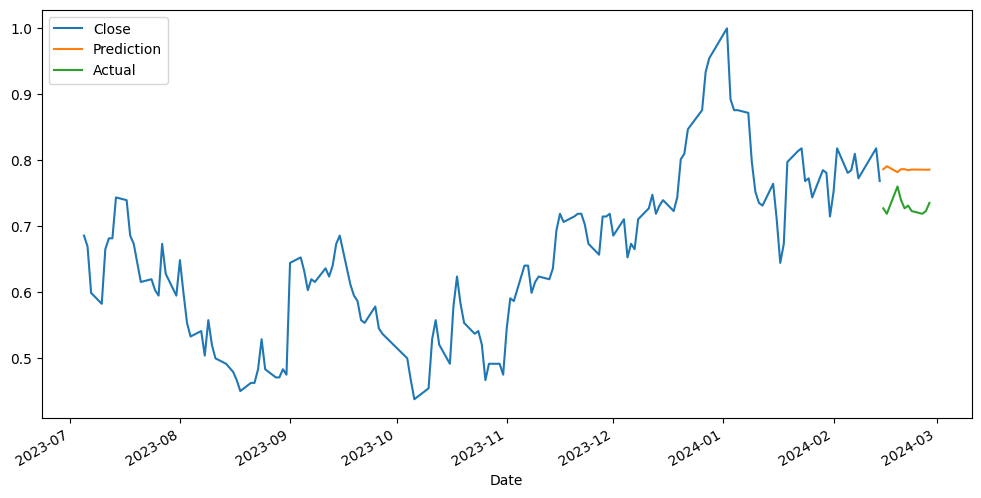

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
demands.tail(150).plot(ax =ax)
ax.plot(test_demands.index, predicts, label='Prediction')
ax.plot(test_demands.index, test_demands.to_list(), label='Actual')
ax.legend(loc='upper left')
plt.show()

### 평가

In [18]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

print('MSE:', MSE(predicts, test_demands.to_list()))
print('MAE:', MAE(predicts, test_demands.to_list()))
print('MAPE:', MAPE(predicts, test_demands.to_list()))

MSE: 0.003264729959423185
MAE: 0.055556465291677494
MAPE: 0.0706359069198711


### norm_z로 예측해 보기

In [19]:
# ma3로 예측
window_size = 3
windows = demands_norm_z.tail(window_size).values
print(windows)
predicts = []
for i in range(len(demands_norm_z)):
    p = np.mean(windows[-3:])
    predicts.append(p)
    windows = np.append(windows, p)
print(f'predicts: {predicts}')
print(f'test_demands: {test_demands_norm_z.to_list()}')

NameError: name 'demands_norm_z' is not defined

1. MA의 평가방법
오늘 계산 값은 내일의 예측값 (20일 ma 값 -> 21일 act 값과 비교)

2. 지표
https://rfriend.tistory.com/667
MSE, MAE

In [20]:

for z in zip(demands[1:].to_list(), ma3[:-1].to_list()):
    print(z)

(0.0, 0.004132231404958646)
(0.0991735537190083, 0.002066115702479323)
(0.11570247933884296, 0.03443526170798898)
(0.1487603305785124, 0.07162534435261708)
(0.21900826446280988, 0.12121212121212122)
(0.20661157024793386, 0.16115702479338842)
(0.21074380165289255, 0.19146005509641872)
(0.21074380165289255, 0.21212121212121207)
(0.22314049586776857, 0.209366391184573)
(0.23553719008264462, 0.21487603305785122)
(0.23140495867768593, 0.2231404958677686)
(0.20661157024793386, 0.2300275482093664)
(0.25206611570247933, 0.22451790633608812)
(0.2644628099173553, 0.23002754820936636)
(0.3305785123966942, 0.24104683195592283)
(0.3512396694214876, 0.2823691460055096)
(0.3801652892561983, 0.3154269972451791)
(0.3264462809917355, 0.3539944903581267)
(0.23140495867768593, 0.3526170798898072)
(0.2644628099173553, 0.3126721763085399)
(0.33471074380165283, 0.2741046831955923)
(0.3471074380165289, 0.2768595041322313)
(0.256198347107438, 0.31542699724517903)
(0.26859504132231404, 0.3126721763085399)
(0.31

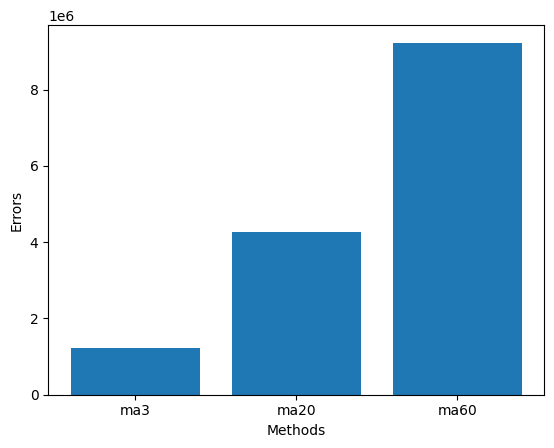

In [20]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

y = [
MSE(demands[1:].to_list(), ma3[:-1].to_list()),
MSE(demands[1:].to_list(), ma20[:-1].to_list()),
MSE(demands[1:].to_list(), ma60[:-1].to_list())]

# y2 = [
# MAE(demands[1:].to_list(), ma3[:-1].to_list()),
# MAE(demands[1:].to_list(), ma20[:-1].to_list()),
# MAE(demands[1:].to_list(), ma60[:-1].to_list())]

plt.bar(['ma3', 'ma20', 'ma60'], y)
# plt.bar(['ma3', 'ma20', 'ma60'], y2)
plt.xlabel('Methods')
plt.ylabel('Errors')
plt.show()